<i><b>Public AI</b></i>
<br>
###  &nbsp;&nbsp; **✎&nbsp;&nbsp;Week 1. Numpy Basis**
# Section 4. Numpy Array 추가와 변형

지금까지 데이터를 원하는 Numpy Array 형태로 구현하고 값을 가져오는 방법을 배웠다면, 이제 생성된 Numpy Array에 새로운 값을 추가하거나 변형시켜볼 차례입니다. 데이터 추가 및 변형을 자유롭게 할 수 있어야 Array로부터 다양한 정보를 뽑아낼 수 있습니다. 

### _Objective_
1. **Numpy Array에 데이터 추가하기**: Array을 합치거나 쌓는 방식인 `stack` 과 `concatenate`를 배워봅니다.<br>
2. **Numpy Array의 형태 바꾸기**: 데이터의 인덱스나 순서에 변화 없이 Array의 형태(`shape`)만을 바꾸는 함수인 `reshape`을 배웁니다. <br>
3. **Numpy Array의 인덱스 순서 바꾸기**: 데이터의 인덱스를 바꾸어 새로운 Array를 생성하는 `transpose`를 배웁니다.<br>

#### 예제 데이터 ) 중간고사, 학생들의 국영수사과 성적표
이번 Section 4에서는 학생들의 국영수사과 성적표를 예제 데이터로 활용하겠습니다. 아래와 같은 `(학생 x 과목)` 형태의 성적표를 Numpy Array로 저장한 후 목적에 맞게 데이터를 추가하거나 변형해봅시다.<br>


| 학생 번호 | 국어 | 영어 | 수학 | 사회 | 과학 |
|  ----   | --- |---| --- | --- | --- |
|0 |80 |92 |70 | 65 | 92 |
|1 |91 |75 |90 | 68 | 85 | 
|2 |86 |76 |42 | 72 | 88 |
|3 |77 |92 |52 | 60 | 80 |
|4 |75 |85 |85 | 92 | 95 |
|5 |96 |90 |95 | 81 | 72 |

In [1]:
import numpy as np

In [2]:
scores = np.array([
    [80,92,70,65,92],
    [91,75,90,68,85],
    [86,76,42,72,88],
    [77,92,52,60,80],
    [75,85,85,92,95],
    [96,90,95,81,72]
])
scores

array([[80, 92, 70, 65, 92],
       [91, 75, 90, 68, 85],
       [86, 76, 42, 72, 88],
       [77, 92, 52, 60, 80],
       [75, 85, 85, 92, 95],
       [96, 90, 95, 81, 72]])

# \[ 1. Numpy Array에 데이터 추가하기\]

Numpy에서는 `np.concatenate`를 사용하면 원하는 축에 데이터를 추가할 수 있으며, `np.stack`을 사용하면 축 자체를 추가할 수 있습니다. 추가하고자 하는 데이터의 특징에 따라 기존에 있는 축에 데이터를 추가해야 할 수도 있고, 축 자체를 추가해야 할 수도 있을 것입니다. 예제를 기반으로 각각의 경우가 어떻게 다른지 이해해봅시다.

## 1. 기존 축에 데이터 추가하기 : `np.concatenate()`

+ `np.concatenate()`는 기존에 있은 축 중에 특정 축에 데이터를 추가할 때 쓰입니다.
+ 기존 데이터와 추가할 데이터의 `ndim`은 동일해야 하며, 데이터가 추가될 축을 제외하고 나머지 축의 `shape` 역시 동일해야 합니다. 
+ 데이터를 추가하고자 하는 축을 `axis` 파라미터로 설정합니다. 

### (1) 행방향으로 추가하기
예를 들어, 2차원 행렬에서는 행 혹은 열 둘 중 한 축을 설정하여 데이터를 추가할 수 있습니다. 2차원 행렬에서는 0번 축이 행이고 1번 축이 열에 해당하므로 행에 추가할 때는 `axis = 0`으로 설정하며 열에 추가할 때는 `axis = 1`로 설정합니다. 아래와 같이 6번 학생의 성적이 누락되어 추가하고자 합니다. 위 예제 데이터에서는 각 행이 학생을 나타내므로 0번 축(`axis = 0`)에 데이터를 추가해야 합니다. 

✎ 6번 학생 성적이 아래와 같을 때, 성적표에 추가하기

<br>

|학생번호|국어|영어|수학|사회|과학|
|---|---|---|---|---|---|
|6|90|82|85|83|81|

<br>

우선 성적 데이터를 Numpy Array에 담아보겠습니다. 

In [3]:
new_score = np.array([90,82,85,83,81]) # 6번 학생의 성적

기존의 성적 데이터 `scores`와 합쳐야 하는데, 위의 Array를 그대로 합치게 되면 아래와 같은 오류를 반환합니다. 

In [4]:
# fix me!

ValueError: all the input arrays must have same number of dimensions

⚠︎ 축에 데이터를 추가하고자 한다면, **(1) 기존 데이터와 추가할 데이터의 차원 수가 동일하고**, **(2) 데이터를 추가하고자 하는 축을 제외한 나머지 축의 shape이 동일해야 합니다.** 그런데 위 경우, 새로 생성한 `new_score`은 두 조건 모두 충족하지 못하였습니다. 자세히 살펴보겠습니다.  먼저, (1) 기존 데이터와 추가할 데이터의 차원 수가 동일한가요?

In [5]:
# fix me! # 기존 데이터의 차원은? : 2차원 행렬  
# fix me! # 추가할 데이터의 차원은? : 1차원 벡터

score 의 차원 수 :  2
new score의 차원 수 :  1


`scores`와 `new_scores` 모두 2차원이어야 하는데, `new_score`는 1차원 벡터의 형태임을 알 수 있습니다. 그럼 (2) 데이터를 추가하고자 하는 축을 제외한 나머지 축의 shape이 동일한가요? `axis = 0`에 추가하는 것이므로 0번 축을 제외한 나머지 축, 즉 1번 축은 동일한 형태여야 합니다. 

In [6]:
# fix me! # 기존 데이터 : 6명의 5개 과목에 대한 성적표 -> shape : ?
# fix me! # 추가할 데이터 : 5개 과목에 대한 성적 나열    -> shape : ?

score 의 shape :  (6, 5)
new score의 shape :  (5,)


그런데 `score`의 1번째 축이 5개의 요소로 구성된 반면 `new_scores`는 0번째 축이 5개의 요소로 구성되어 있고 1번째 축은 없습니다. 그래서 오류가 발생한 것이죠. 

이 오류를 해결하기 위해서는 `new_score`를 2차원 행렬로 바꾸고 1번째 차원의 원소가 5개이고 0번째 차원의 원소가 1개가 되도록 shape을 바꿔주어야 합니다. 즉 `(1,5)` 의 shape을 가지도록 바꿔주어야 합니다. 

In [7]:
# fix me! # 혹은 나중에 배우게 될 reshape 함수를 써서 변형. new_score.reshape(1,5) 

array([[90, 82, 85, 83, 81]])

In [8]:
# fix me! # 기존 데이터 : 6명의 5개 과목에 대한 성적표 -> shape : ?
# fix me! # shape을 바꿔준 추가할 데이터 : 1명의 5개 과목에 대한 성적  -> shape : ?

score 의 shape :  (6, 5)
new score의 shape :  (1, 5)


이제 데이터를 추가하고자 하는 0번째 축을 제외하고 나머지 축의 데이터 형태가 동일해졌으므로 `score`와 `new_score`를 `np.concatenate`로 합칠 수 있게 되었습니다. 

In [9]:
np.concatenate([scores,new_score],axis=0)

array([[80, 92, 70, 65, 92],
       [91, 75, 90, 68, 85],
       [86, 76, 42, 72, 88],
       [77, 92, 52, 60, 80],
       [75, 85, 85, 92, 95],
       [96, 90, 95, 81, 72],
       [90, 82, 85, 83, 81]])

### (2) 열방향으로 추가하기

위 예제 데이터에서 각 열은 과목을 나타냅니다. '코딩' 이라는 수업이 추가되어 모든 학생들의 성적을 추가하려 합니다.  
✎ 코딩 수업의 성적이 아래와 같을 때, 성적표에 추가하기

| 학생 번호 | 0 | 1 | 2 | 3 | 4 | 5 |
| ---| ---| ---| ---| ---| ---|---|
| 코딩 성적 | 82 | 85 |91 | 65 | 72 | 55 |
<br>

위 성적을 리스트 형식으로 만들어 `np.array`로 변환하면 코딩 과목 성적 벡터는 다음과 같이 shape은 (6,)의 형태로 만들어 집니다. 

In [10]:
coding_scores = np.array([82,85,91,65,72,55])

In [11]:
# fix me! # 기존 데이터 : 6명의 5개 과목에 대한 성적표   -> shape : ?
# fix me! # 추가할 데이터 : 1개 과목에 대한 6명의 성적 나열 -> shape : ?

score 의 shape :  (6, 5)
coding_scores shape :  (6,)


열은 2차원 행렬에서 1번 축에 해당합니다. 이번에 역시 (1) 기존 데이터와 추가할 데이터의 차원 수가 동일하고, (2) 데이터를 추가하고자 하는 1번 축을 제외한 나머지 축의 shape이 동일해야 합니다. 

기존 데이터인 `scores` 는 (6,5)의 형태이므로 `coding_scores`를 (1) 2차원의 행렬로 바꾸고 (2) 데이터를 추가하고자 하는 1번째 축을 제외한 나머지 축(0번 축)의 형태가 동일하게 6이 되도록 만들어야 합니다. 즉, `(6,1)`의 형태로 만들어야 하는 것이죠.

In [12]:
coding_scores = np.array([[82],
       [85],
       [91],
       [65],
       [72],
       [55]]) # 혹은 나중에 배우게 될 reshape 함수를 써서 변형. coding_scores.reshape(6,1) 
coding_scores

array([[82],
       [85],
       [91],
       [65],
       [72],
       [55]])

In [13]:
# fix me! # 기존 데이터 : 6명의 5개 과목에 대한 성적표   -> shape : ?
# fix me! # 추가할 데이터 : 6명의 1개 과목에 대한 성적 나열 -> shape : ?

score 의 shape :  (6, 5)
coding_scores shape :  (6, 1)


`coding_scores`는 `scores`의 열로 추가되는 것이므로 기준이 되는 축을 1번 축으로 설정하여 `(axis = 1)`로 지정합니다.

In [14]:
new_scores = np.concatenate([scores, coding_scores],axis=1)
new_scores

array([[80, 92, 70, 65, 92, 82],
       [91, 75, 90, 68, 85, 85],
       [86, 76, 42, 72, 88, 91],
       [77, 92, 52, 60, 80, 65],
       [75, 85, 85, 92, 95, 72],
       [96, 90, 95, 81, 72, 55]])

## 2. 축 추가하여 데이터 합치기 : np.stack()
+ np.stack()은 기존 Array에 없던 축을 추가하여 Array를 합치는 방법입니다. 
+ 합치는 Array간의 형태(shape)는 동일해야 합니다. 
+ `np.stack()`에서 `axis`로 데이터를 쌓을 방향을 특정하면 해당 방향을 기준으로 데이터가 쌓이게 됩니다. 


#### 데이터 2) 기말고사, 학생들의 국영수사과 성적표

| 학생 번호 | 국어 | 영어 | 수학 | 사회 | 과학 |
|  ----   | --- |---| --- | --- | --- |
|0 |85 |95 |90 | 66 | 93 |
|1 |93 |70 |80 | 60 | 81 | 
|2 |89 |78 |55 | 75 | 80 |
|3 |80 |94 |59 | 72 | 90 |
|4 |70 |82 |81 | 95 | 72 |
|5 |90 |76 |93 | 82 | 89 |

✎ 중간고사 성적과 기말고사 성적 합치기

1학기 성적을 처리하기 위해 앞서 제시된 중간고사 데이터와 기말고사 데이터를 합치고자 합니다.  


In [15]:
final_scores = np.array([
    [85,95,90,66,93],
    [93,70,80,60,81],
    [89,78,55,75,80],
    [80,94,59,72,90],
    [70,82,81,95,72],
    [90,76,93,82,89]
])

In [16]:
# fix me! # 중간고사 성적의 shape은?
# fix me! # 기말고사 성적의 shape은?

scores의 shape :  (6, 5)
final_scores의 shape :  (6, 5)


일단 합치고자 하는 두 Array의 shape이 동일함은 확인하였습니다. **시험 시기(중간/기말)**이라는 새로운 축이 추가될 예정이므로 `np.stack()`의 결과는 3차원 행렬이 될 것입니다. 3차원으로 합쳐질 것이기 때문에 데이터는 0번 축부터 2번 축까지, 총 3가지 자리에 **시험 시기(중간/기말)**라는 새로운 기준이 추가 될 수 있을 것입니다. 

합친 결과의 shape은 어떠할까요? 어떤 자리에 새로운 축을 추가하느냐에 따라 `(2, 6, 5)`이 될 수도 있고,  `(6, 2, 5)`가 될 수도 있고, `(6, 5, 2)`가 될 수도 있을 것입니다. 

각각의 경우를 좀 더 자세히 살펴봅시다. 

### (1) 기존 shape 유지하여 쌓기 : `axis=0`

기존의 `scores`와 `final_scores`는 0번 축과 1번 축이 각각 **(0)학생 번호 (1) 과목을 나타내는 형태였습니다.** 각 원소는 학생의 특정 과목 성적을 나타내죠. 기존의 두 Array의 형태가 그대로 유지되면서 쌓으려면 `np.stack()`의 파라미터 `axis = 0`로 설정합니다. 

In [17]:
# fix me! # 중간고사와 기말고사를 axis 0을 기준으로 합친 all_scores

In [18]:
all_scores

array([[[80, 92, 70, 65, 92],
        [91, 75, 90, 68, 85],
        [86, 76, 42, 72, 88],
        [77, 92, 52, 60, 80],
        [75, 85, 85, 92, 95],
        [96, 90, 95, 81, 72]],

       [[85, 95, 90, 66, 93],
        [93, 70, 80, 60, 81],
        [89, 78, 55, 75, 80],
        [80, 94, 59, 72, 90],
        [70, 82, 81, 95, 72],
        [90, 76, 93, 82, 89]]])

`axis = 0`으로 설정하여 `scores`와 `fnal_scores` 두 Array를 합친 `all_scores` 를 보면, 가장 바깥쪽 대괄호(= `axis = 0`) 안에 두 Array가 합쳐졌음을 확인할 수 있습니다.  새로 생성된 `all_scores`의 shape을 보면 3차원의 데이터이고 0번째 축을 기준으로 2개의 Array가 쌓였기 때문에 shape의 0번째 값, 즉 0번 축이 2가 되었습니다. 여기서 `(2, 6, 5)`는 `(시험 실시기준(중간|기말) X 학생 번호(0~5) X 과목 수(국영수사과))` 를 의미합니다. 

In [19]:
# fix me! # all_scores의 shape은?

all_scores의 shape :  (2, 6, 5)


인덱스 역시 `(시험 실시기준(중간|기말) X 학생 번호(0~5) X 과목 수(국영수사과))`  순서에 따라 접근할 수 있습니다. 즉, 0번 축의 인덱스 값으로는 시험 실시 시점에, 1번 축의 인덱스로는 학생의 번호에, 2번 축의 인덱스로는 과목에 접근할 수 있습니다. 

In [20]:
# (0번 축) 중간 고사 시험 결과. (1번 축) 전체 학생의 (2번 축) 전과목 성적
# fix me!

array([[80, 92, 70, 65, 92],
       [91, 75, 90, 68, 85],
       [86, 76, 42, 72, 88],
       [77, 92, 52, 60, 80],
       [75, 85, 85, 92, 95],
       [96, 90, 95, 81, 72]])

In [21]:
# (0번 축) 중간고사 시험 결과 중, (1번 축) 3번 학생의 (2번 축) 전과목 성적 
# fix me!

array([77, 92, 52, 60, 80])

In [22]:
# (0번 축) 중간고사 시험 결과 중, (1번 축) 3번 학생의 (2) 2번 과목(수학) 성적
# fix me!

52

### (2) 데이터를 교차하여 쌓기: `axis = 1`, `axis = 2`, `...`

앞서 `axis=0`으로 설정하여 `(2, 6, 5)` 형태로 데이터를 합쳐보았습니다. 기존에 `axis = 0`로 설정하면 아래와 같이 0번 축에서 **중간고사 성적표**와 **기말고사 성적표**가 합쳤던 것입니다. 0번 축의 1번 요소는 중간고사, 0번 축의 1번 요소는 기말고사 성적이 되어 아래와 같이 (**시험 시기** X 학생 x 과목) 형태가 되었던 것이죠. 

```
[[[0번 학생의 중간고사 전과목 성적], [1번 학생의 중간고사 전과목 성적], ... , [5번 학생의 중간고사 전과목 성적]],

[[0번 학생의 기말고사 전과목 성적], [1번 학생의 기말고사 전과목 성적], ... , [5번 학생의 기말고사 전과목 성적]]]
```



그럼 `axis=1`로 설정하거나 `axis=2`로 설정하면 어떻게 될까요? 각각 `(6,2,5)`과 `(6,5,2)` 형태로 데이터가 합쳐질 것입니다. 이처럼 `axis`를 0이 아닌 다른 값으로 조정하면, 데이터를 교차하여 합치게 됩니다. 데이터는 다음과 같이 선택한 axis를 기준으로 교차되어 쌓입니다. 

- `axis = 1` : 1번 축에서 합치고자 하는 데이터를 교차시킴  ==> (학생 X **시험 시기** X 과목)
- `axis = 2` : 2번 축에서 합치고자 하는 데이터를 교차시킴 ==> (학생 X 과목 X **시험 시기**)

기준 축이 1 이상이 되면 교차 Array가 만들어지면서 Array가 쌓이고, `axis=0`과는 다르게 눈에 보이는 python 에서 `print`되는 가장 안쪽 괄호의 데이터 구성이 달라지므로 데이터가 쌓이는 방식이 헷갈리기 쉽습니다. 예제를 통해 하나씩 배워봅시다. 

#### 1) `axis=1`으로 데이터 쌓기


`axis=1`로 설정하여 1번 축에서 데이터를 교차시킨다면 어떨까요? 아래와 같이 **1번 축에서 중간 고사와 기말고사가 교차**되면서 데이터가 쌓입니다.
```
[[[0번 학생의 중간고사 전과목 성적],
[0번 학생의 기말고사 전과목 성적]], 

[[1번 학생의 중간고사 전과목 성적],
[1번 학생의 기말고사 전과목 성적]],

... , 

[[5번 학생의 중간고사 전과목 성적],
[5번 학생의 기말고사 전과목 성적]]]
```


**0번 학생의 중간고사 전과목 성적**과 **0번 학생의 기말고사 전과목 성적**을 교차시킨 후, **1번 학생의 중간고사 전과목 성적**과 **1번 학생의 기말고사 전과목 성적**을 교차하는 식입니다. 이처럼 `axis = 1`로 설정하면 1번 축 자리에 `시험 시기`라는 새로운 기준을 추가되면서 데이터가 합쳐지게 됩니다. 실제 `np.stack`의 결과를 봅시다. 

In [23]:
# fix me! # 중간고사와 기말고사를 axis 1을 기준으로 합친 all_scores
# fix me! # all scores의 shape?

(6, 2, 5)

In [24]:
all_scores

array([[[80, 92, 70, 65, 92],
        [85, 95, 90, 66, 93]],

       [[91, 75, 90, 68, 85],
        [93, 70, 80, 60, 81]],

       [[86, 76, 42, 72, 88],
        [89, 78, 55, 75, 80]],

       [[77, 92, 52, 60, 80],
        [80, 94, 59, 72, 90]],

       [[75, 85, 85, 92, 95],
        [70, 82, 81, 95, 72]],

       [[96, 90, 95, 81, 72],
        [90, 76, 93, 82, 89]]])

1번 축에서 중간고사와 기말고사 성적을 합친 `all_scores`는 0번 축의 인덱스로는 각 학생에게, 1번 축의 인덱스로는 시험 시기에, 2번 축의 인덱스는 각 과목에 접근할 수 있습니다. 

In [25]:
# (0번 축) 0번 학생. (1번 축) 전체 시험 시기 (2번 축) 전과목 성적
# fix me!

array([[80, 92, 70, 65, 92],
       [85, 95, 90, 66, 93]])

In [26]:
# (0번 축) 전체 학생. (1번 축) 중간고사 (2번 축) 전과목 성적
# fix me!

array([[80, 92, 70, 65, 92],
       [91, 75, 90, 68, 85],
       [86, 76, 42, 72, 88],
       [77, 92, 52, 60, 80],
       [75, 85, 85, 92, 95],
       [96, 90, 95, 81, 72]])

In [27]:
# (0번 축) 전체 학생. (1번 축) 전체 시험 시기 (2번 축) 0번 과목(국어) 성적
# fix me!

array([[80, 85],
       [91, 93],
       [86, 89],
       [77, 80],
       [75, 70],
       [96, 90]])

#### 2) `axis = 2`로 데이터 쌓기


`axis=2`로 설정하여 2번 축 자리에 시험 시기라는 축이 추가되어 데이터를 쌓으면 어떨까요? **2번 축에서 중간고사와 기말고사 데이터가 교차되어** `(6, 5, 2)`이자 `(학생 X 과목 X 시험 시기)` 의 결과가 나올 것이며 아래와 같은 형태일 것입니다.

```
[[[0번 학생 국어 중간, 0번 학생 국어 기말],
[0번 학생 영어 중간, 0번 학생 영어 기말],
[0번 학생 수학 중간, 0번 학생 수학 기말],
[0번 학생 사회 중간, 0번 학생 사회 기말],
[0번 학생 과학 중간, 0번 학생 과학 기말]], 

..., 
[[5번 학생 국어 중간, 5번 학생 국어 기말],
[5번 학생 영어 중간, 5번 학생 영어 기말],
[5번 학생 수학 중간, 5번 학생 수학 기말],
[5번 학생 사회 중간, 5번 학생 사회 기말],
[5번 학생 과학 중간, 5번 학생 과학 기말]]]
```

**0번 학생의 국어 중간고사**과 **0번 학생의 국어 기말고사**을 교차하고, **0번 학생의 영어 중간고사**과 **0번 학생의 영어 기말고사**를 교차하는 식으로 각 학생의 각 과목 중간 / 기말 고사 성적을 교차시키는 것이죠. 이처럼 `axis = 2`로 설정하면 2번 축 자리에 `시험 시기`라는 새로운 기준을 추가되면서 데이터가 합쳐지게 됩니다. 실제 `np.stack`의 결과를 봅시다. 

In [28]:
# fix me! # 중간고사와 기말고사를 axis 2를 기준으로 합친 all_scores
# fix me! # all scores의 shape?

(6, 5, 2)

In [29]:
all_scores

array([[[80, 85],
        [92, 95],
        [70, 90],
        [65, 66],
        [92, 93]],

       [[91, 93],
        [75, 70],
        [90, 80],
        [68, 60],
        [85, 81]],

       [[86, 89],
        [76, 78],
        [42, 55],
        [72, 75],
        [88, 80]],

       [[77, 80],
        [92, 94],
        [52, 59],
        [60, 72],
        [80, 90]],

       [[75, 70],
        [85, 82],
        [85, 81],
        [92, 95],
        [95, 72]],

       [[96, 90],
        [90, 76],
        [95, 93],
        [81, 82],
        [72, 89]]])

2번 축에서 중간고사와 기말고사 성적이 교차되기 때문에, 0번 축의 인덱스로는 각 학생에게, 1번 축의 인덱스로는 과목별 성적에, 2번 축의 인덱스는 시험 시기에 접근할 수 있습니다. 

In [30]:
# (0번 축) 0번 학생. (1번 축) 전과목 (2번 축) 전체 시험 시기
# fix me!

array([[80, 85],
       [92, 95],
       [70, 90],
       [65, 66],
       [92, 93]])

In [31]:
# (0번 축) 전체 학생. (1번 축) 0번 과목(국어) (2번 축) 전체 시험 시기
# fix me!

array([[80, 85],
       [91, 93],
       [86, 89],
       [77, 80],
       [75, 70],
       [96, 90]])

In [32]:
# (0번 축) 전체 학생. (1번 축) 전과목 (2번 축) 중간 고사
# fix me!

array([[80, 92, 70, 65, 92],
       [91, 75, 90, 68, 85],
       [86, 76, 42, 72, 88],
       [77, 92, 52, 60, 80],
       [75, 85, 85, 92, 95],
       [96, 90, 95, 81, 72]])

# \[ 2. Numpy Array의 형태 바꾸기\]

기존 Numpy Array의 형태를 변경하여 새로운 형태의 Array를 만들어야 할 때도 있습니다. 이번에는 데이터의 순서나 원소의 갯수에 영향을 미치지 않고 Array의 형태(shape)를 변경하는 `resahpe`를 배워보겠습니다.

## 1. reshape 개념 이해하기
+ `.reshape` 메소드를 이용하면 데이터의 순서와 구성 원소의 수가 바뀌지 않은 상태에서 인덱스 값만 바뀌어 기존 Array를 짤라서 보는 기준이 달라집니다.
+ 벡터를 2차원, 3차원 형태로 바꿔보면서 `reshape`이 어떻게 작동하는지 살펴봅시다.

#### 1) 벡터를 2차원 형태로 바꾸기

1부터 6까지 6개 원소로 구성된 `(6,)` 형태의 Array `A`를 만들어봅시다. 

In [33]:
A = np.array([1,2,3,4,5,6])

In [34]:
A.size

6

A는 6개의 원소로 구성되어 있으므로 `(2,3)`, `(3,2)`, `(6,1)` 등의 shape으로 형태를 바꿔볼 수 있습니다. 세 가지 모두 원소를 6개 가질 수 있는 행렬의 형태이기 때문입니다. 각각은 어떤 결과물을 반화하게 될까요? 

![](https://cdn-images-1.medium.com/max/800/1*CuwVsxTj4Ksdng1bbLps_g.png)

Numpy Array의 shape은 **인덱스를 매기는 방법을 결정합니다.**  `reshape`을 이용하면 (6,)의 shape을 가지는 이 벡터의 인덱스를 매기는 방법을 바꾸어 다양한 형태의 행렬을 만들 수 있습니다. 

`(6,)` 형태의 벡터를 `(2,3)` 형태의 행렬로 만들어 봅시다. 벡터를 구성하는 첫 번째 원소부터 인덱스를 정하면 `[0,0]`, `[0,1]`, `[0,2]`… 과 같이 가장 우측의 값부터 하나씩 올라갑니다. 올라가다가 shape의 가장 우측에 있는 값만큼 원소 수가 채워지면 그 다음 좌측에 있는 인덱스의 값이 올라갑니다. 이 경우 `(2,3)`에서 가장 우측에 있는 값은 `3`입니다. 0번 축은 2개 요소로 구성되어 있으며 1번 축은 3개 요소로 구성한다는 뜻이죠. 

원소에 순서대로 인덱스를 매겨볼까요? 먼저 0번 축은 0번 인덱스로 고정한 상태에서 1번 축의 인덱스를 0부터 2까지 늘려가며 총 3개의 요소를 인덱싱합니다. 인덱스 값이 Shape의 가장 우측 값과 동일한 값이 되면(즉 가장 높은 축 번호를 가지는 축의 요소 수가 채워지고 나면) 마치 자릿수가 올라가듯이 다음 축의 인덱스 값이 하나 커집니다.




![](https://cdn-images-1.medium.com/max/800/1*RbuwD14yiBNa1sDjBN5MQQ.png)

코드로 직접 형태를 바꿔봅시다. 

In [35]:
A_2_3 = A.reshape((2,3))
A_2_3

array([[1, 2, 3],
       [4, 5, 6]])

A_2_3의 원소 `4`에 접근하려면 어떤 인덱스를 입력하면 될까요?

In [36]:
# fix me!

4

앞서 말했듯이 A를 `(2,3)` 외에도 `(3,2)`, `(6,1)` 등의 형태로 바꿀 수 있으며 그 결과는 아래와 같습니다.

![](https://cdn-images-1.medium.com/max/800/1*hlbXgKIEROL2-Pq_5TJy0w.png)

## 2. 예제 데이터로 reshape 다뤄보기

아래와 같이 3가지 제품의 제품별 **월 판매량** 데이터가 있다고 합시다.

### 예제 1)  제품별 월 판매량 데이터를 분기별 판매량으로 변환하기 
<br>

|월별 | 1 | 2 | 3 | 4 | 5 |6|7|8|9|10|11|12|
|---|---|---|---|---|---|---|---|---|---|---|---|---|
|A모델|30|33|35|31|36|32|37|39|42|37|38|39|
|B모델|20|22|25|21|23|29|32|30|35|31|36|38|
|C모델|10|12|11|13|10|16|12|11|15|12|13|12|

#### 예상 결과) 분기별 판매량 정보
reshape을 활용하면 위 데이터로부터 간단히 아래와 같은 분기별 판매량을 구할 수 있습니다.<br>
<br>

|분기| 1Q | 2Q | 3Q | 4Q |
|---|---|---|---|---|
|A모델|98|99|118|114|
|B모델|67|73|97|105|
|C모델|33|39|38|37|

이 데이터를 np.array로 만들어보면 아래와 같이 구성할 수 있습니다.

In [37]:
sales = np.array([
    [30,33,35,31,36,32,37,39,42,37,38,39],
    [20,22,25,21,23,29,32,30,35,31,36,38],
    [10,12,11,13,10,16,12,11,15,12,13,12]
])

`sales`의 shape는 (모델 수, 개월 수)인 **(3,12)**입니다.

In [38]:
# fix me! # shape = (모델 별(a,b,c), 월 별 (1~12월))

(3, 12)

이 데이터로부터 아래와 같은 **분기별** 판매량을 구하고 싶다면 어떻게 해야 할까요? 3개월씩 4개 분기로 나누어 묶은 후에, 분기별 판매량 합을 계산하면 될 것입니다.

먼저, 3개월씩 4개 나눔으로 제품별 판매량을 나누어야 합니다. 매출 데이터의 기준이 기존에 **12개월** 이었다면, 이를 나누어 **4분기 x 3개월**로 바뀌는 것이죠.

|분기 | 1Q(1~3) | 2Q(4~6) | 3Q(7~9) | 4Q(10~12) |
|---|----|---|---|---|
|A모델|[30,33,35]|[31,36,32]|[37,39,42]|[37,38,39]|
|B모델|[20,22,25]|[21,23,29]|[32,30,35]|[31,36,38]|
|C모델|[10,12,11]|[13,10,16]|[12,11,15]|[12,13,12]|

이렇게 되면 A모델의 판매량은 `[30,33,35,31,36,32,37,39,42,37,38,39]` 형태에서 `[30, 33, 35],[31, 36, 32],[37, 39, 42],[37, 38, 39]`로 4개 분기로 나누기 위해 3개월씩 묶어야 합니다. **데이터의 순서는 바뀌지 않아야 하지만, 데이터를 묶어보는 기준이 하나 더 추가되어 바뀌어야 하는 것이죠.** <br>
<br>
앞서 만든 `sales` array의 shape 을 **(3,12)**에서 **(3,4,3)**으로 바꿔보겠습니다. (3,4,3)은 (모델 수, 분기 수, 분기 내 개월 수)를 의미합니다.

In [39]:
# fix me! # (모델 별, 분기 별, 분기 내 월 별) == (3, 4, 3)

array([[[30, 33, 35],
        [31, 36, 32],
        [37, 39, 42],
        [37, 38, 39]],

       [[20, 22, 25],
        [21, 23, 29],
        [32, 30, 35],
        [31, 36, 38]],

       [[10, 12, 11],
        [13, 10, 16],
        [12, 11, 15],
        [12, 13, 12]]])

그 다음, 각 분기별 판매량을 더해줍니다. 예를 들어, A모델의 1분기 판매량은 `[30, 33, 35]`입니다. 이를 더해주면 `98`이 됩니다. Array의 shape에서 가장 마지막에 해당하는, 즉 **가장 안쪽에 있는, 가장 낮은 단위**의 묶음인 **제품별 분기 내 판매량** 3개의 값을 더하여 (3,4)의 결과를 반환해야 합니다. 따라서 마지막 축인 `axis=2`를 기준으로 구성하는 원소를 압축하여 합계를 구해야 합니다. `.sum(axis = 2)`로 설정합니다. 축 단위 연산의 자세한 내용은 Section 6에서 다룰 예정입니다. 

In [40]:
sales.shape

(3, 4, 3)

In [41]:
sales_quarterly = sales.sum(axis=2)
sales_quarterly

array([[ 98,  99, 118, 114],
       [ 67,  73,  97, 105],
       [ 33,  39,  38,  37]])

In [42]:
sales_quarterly.shape

(3, 4)

**이처럼 `reshape`은 Array의 원본 데이터의 순서는 그대로 두고 Array의 형태를 바꿔줍니다.** 인덱스가 바뀌긴 하지만 원본 순서는 그대로 두기 때문에 인덱스는 순차적으로 커집니다. 데이터를 묶어보는 기준만 달라진 것이죠.

# \[ 3. Numpy Array의 축 위치 바꾸기\]
`reshape`과 다르게 원본 인덱스의 순서를 바꾸어야 하는 경우도 있습니다. 가령 어떤 원소의 인덱스가`[1,0]`였다면 `[0,1]`로, `[2,3]`이었다면 `[3,2]`로 바꿔줘야 하는 것이죠. 이때는 `transpose` 를 사용해야 합니다.

## 1. `transpose` 개념 이해하기 
+ `.transpose` 메소드를 이용하면 인덱스의 순서를 바꿀 수 있습니다. 
+ 행렬의 인덱스를 바꿔보면서 `transpose`가 어떻게 작동하는지 살펴봅시다.

6개의 원소로 구성되어 있으며 `(2,3)`의 shape을 가지는 Array `A`가 있다고 합시다. 

In [43]:
A = np.array([1,2,3,4,5,6]).reshape(2,3)

A는 2차원 행렬로 축은 총 2개입니다. 각각을 0번 축, 1번 축이라고 합니다. 0번 축과 1번 축의 인덱스 위치를 서로 맞바꾸고 싶다면 `.transpose(1,0)`로 설정합니다. 

In [44]:
# fix me!

array([[1, 4],
       [2, 5],
       [3, 6]])

`A`에서 `[0,2]`자리에 있던 값은 `[2,0]`로 옮겨졌을 것입니다. 

In [45]:
# fix me! # A에서의 [0,2] 위치에 있던 값은
# fix me! # Transpose한 결과의 [2,0] 위치로 옮겨졌습니다. 

A[2,0] :  3
A_T[0,2] :  3


이를 시각적으로 표현하면 아래와 같이 됩니다.

![](https://cdn-images-1.medium.com/max/800/1*qhE1SHjxJRixgu9I2uULLw.png)

## 2. 예제 데이터로 `transpose` 다뤄보기

`transpose`는 실전에선 어떤 데이터를 다룰 때 사용할 수 있을까요?`transpose`는  `reshape`과 함께 이미지 처리에서 강력한 힘을 발휘하는 함수입니다. 다수의 이미지 파일을 Array로 표현하면 그 형태는 `(이미지 수, 세로 픽셀 수, 가로 픽셀 수)`로 나타낼 수 있을 것입니다. 이번에는 간단히 단색 이미지 3개 파일이 있는데, 이를 옆으로 이어붙이는 작업을 reshape와 transpose를 활용해서 해보겠습니다. 

In [46]:
from matplotlib import pyplot as plt
%matplotlib inline

왼쪽과 같이 겹쳐진 단색 3개 이미지가 있다고 합시다. 각 이미지는 `(3,3)`이고, 3개 이미지가 겹쳐져 있으므로 왼쪽의 형태는 `(3,3,3)`입니다. 이를 옆으로 이어 붙여서 오른쪽과 같은 형태를 만들고 싶습니다. 오른쪽의 형태는 `(3,9)`입니다.

![](https://cdn-images-1.medium.com/max/1200/1*jE3qbCGmuiONbDQfFCSHlQ.png)

위 예제 데이터를 Array로 표현하면 아래와 같습니다.

In [47]:
images = np.array([[[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]],

       [[3, 3, 3],
        [3, 3, 3],
        [3, 3, 3]]])

오른쪽과 같이 이미지를 이어붙인 결과를 만들려면 어떻게 해야 할까요? shape을 `(3,9)`로 바꾸면 될까요? `reshape`을 이용해 `(3,9)`의 형태로 바꿔봅시다.

In [48]:
# fix me! # images의 shape을 바꿔주세요

array([[1, 1, 1, 1, 1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3, 3, 3, 3, 3]])

원하는 결과가 만들어졌나요? 형태는 `(3,9)`이지만 앞서 원했던 이미지를 이어붙인 형태는 아닙니다. 각 값의 인덱스는 아래와 같이 바뀌었습니다.

![](https://cdn-images-1.medium.com/max/1200/1*3xZzM-dVhodWrXjSTeVSqA.png)

이미지로 보면 아래와 같습니다. 오히려 이미지를 3분의 1씩 잘라서 옆으로 이어붙인 형태에 가깝습니다. 이렇게 되면 원본 이미지가 훼손되므로 올바른 결과가 아닙니다. 

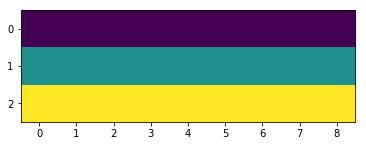

In [49]:
plt.imshow(images_try1)

그럼 어떻게 해야할까요?  

shape을 `(3,9)`로 바꾸기 전에 한 단계 더 변환히 필요할 것 같습니다. `reshape` 전에 아래와 같이 `transpose` 과정을 거쳐야합니다. 0번 축과 1번 축의 위치가 바뀌어야 하는 것이죠.

![](https://cdn-images-1.medium.com/max/800/1*9cf7s4kaVFfjxqO8OAK_ug.png)

위 이미지와 같이 `transpose`를 하려면 0번 축과 1번 축의 위치를 바꿔야 합니다. `images.transpose(1,0,2)`로 설정하여 바꿔봅시다. 결과는 아래와 같습니다. 

In [50]:
# fix me! # image를 transpose 해주세요

array([[[1, 1, 1],
        [2, 2, 2],
        [3, 3, 3]],

       [[1, 1, 1],
        [2, 2, 2],
        [3, 3, 3]],

       [[1, 1, 1],
        [2, 2, 2],
        [3, 3, 3]]])

그 다음에 `reshape`을 하게 되면 아래와 같은 결과가 나옵니다. 

In [51]:
# fix me! # 위의 결과를 reshape 해주세요

array([[1, 1, 1, 2, 2, 2, 3, 3, 3],
       [1, 1, 1, 2, 2, 2, 3, 3, 3],
       [1, 1, 1, 2, 2, 2, 3, 3, 3]])

원하는 결과가 만들어졌나요? 각 값의 인덱스는 아래와 같이 바뀌었습니다.

![](https://cdn-images-1.medium.com/max/800/1*x5bBcRI8XDiypo5FsJ5byQ.png)

이미지로 그려보면 아래와 같습니다. 원하는 형태가 만들어졌습니다.

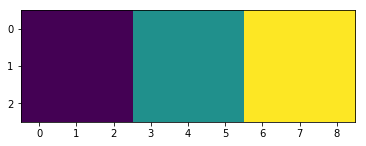

In [52]:
plt.imshow(images_try2)

#  

---

    Copyright(c) 2019 by Public AI. All rights reserved.
    Writen by PAI, SangJae Kang ( rocketgrowthsj@publicai.co.kr )  last updated on 2019/03/04


---